In [1]:
# Necessary libraries are imported

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import f_oneway



In [2]:
# Load the dataset
file_path = "Result Data.csv"  # Replace with your file name
df = pd.read_csv(file_path)
df


,Unnamed: 0,Unnamed: 1,Feed-1,Unnamed: 3,Unnamed: 4,Feed-2,Unnamed: 6,Unnamed: 7,Feed-3,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14
0,Day,NaN,T1Rp1,T1Rp2,T1Rp3,T2Rp1,T2Rp2,T2Rp3,T3Rp1,T3Rp2,T3Rp3,Temperature (?c),Salinity (ppt),pH,DO (mg/L)
1,1,NaN,235,154,115,130,117,114,442,112,83,24.05,29.33,8.18,7.88
2,3,NaN,238,158,118,133,120,117,453,115,86,24,29.44,8.18,7.85
3,6,NaN,250,164,133,147,127,138,470,120,90,25,29.44,8.08,7.65
4,9,NaN,264,172,158,161,153,154,490,127,96,25,31.22,8.03,7.31
5,12,NaN,288,181,183,190,182,168,515,135,103,22.55,33.22,8,7.34
6,15,NaN,314,219,264,277,236,247,549,174,148,23.88,33.44,7.99,7.03
7,18,NaN,317,223,270,283,242,253,558,182,156,26,31.88,7.95,7.97
8,21,NaN,322,229,277,289,247,259,566,190,164,24.11,30.55,8.03,7.37
9,24,NaN,325,243,280,294,257,265,574,198,172,25,32.11,8.01,7.25


In [3]:
# Use the first row as headers
new_header = df.iloc[0]
df = df[1:]
df.columns = new_header
df.reset_index(drop=True, inplace=True)

In [4]:
# Rename the first column (Day column)
df.rename(columns={df.columns[0]: 'day'}, inplace=True)

# Define columns for each feed replicate
growth_columns = {
    'Feed-1': ['T1Rp1', 'T1Rp2', 'T1Rp3'],
    'Feed-2': ['T2Rp1', 'T2Rp2', 'T2Rp3'],
    'Feed-3': ['T3Rp1', 'T3Rp2', 'T3Rp3']
}

# Convert replicate columns to numeric
for reps in growth_columns.values():
    for col in reps:
        df[col] = pd.to_numeric(df[col], errors='coerce')


C:\Users\user\AppData\Local\Temp\ipykernel_4600\660632210.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={df.columns[0]: 'day'}, inplace=True)
C:\Users\user\AppData\Local\Temp\ipykernel_4600\660632210.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = pd.to_numeric(df[col], errors='coerce')


In [5]:
df

,day,NaN,T1Rp1,T1Rp2,T1Rp3,T2Rp1,T2Rp2,T2Rp3,T3Rp1,T3Rp2,T3Rp3,Temperature (?c),Salinity (ppt),pH,DO (mg/L)
0,1,NaN,235,154,115,130,117,114,442,112,83,24.05,29.33,8.18,7.88
1,3,NaN,238,158,118,133,120,117,453,115,86,24,29.44,8.18,7.85
2,6,NaN,250,164,133,147,127,138,470,120,90,25,29.44,8.08,7.65
3,9,NaN,264,172,158,161,153,154,490,127,96,25,31.22,8.03,7.31
4,12,NaN,288,181,183,190,182,168,515,135,103,22.55,33.22,8,7.34
5,15,NaN,314,219,264,277,236,247,549,174,148,23.88,33.44,7.99,7.03
6,18,NaN,317,223,270,283,242,253,558,182,156,26,31.88,7.95,7.97
7,21,NaN,322,229,277,289,247,259,566,190,164,24.11,30.55,8.03,7.37
8,24,NaN,325,243,280,294,257,265,574,198,172,25,32.11,8.01,7.25
9,27,NaN,329,257,285,299,260,271,582,206,180,26.11,32.78,7.76,6.96


In [6]:
# Compute average growth for each food
df['Feed1_avg'] = df[growth_columns['Feed-1']].mean(axis=1)
df['Feed2_avg'] = df[growth_columns['Feed-2']].mean(axis=1)
df['Feed3_avg'] = df[growth_columns['Feed-3']].mean(axis=1)

# Convert environmental columns to numeric
env_cols = ['Temperature (?c)', 'Salinity (ppt)', 'pH', 'DO (mg/L)']
for col in env_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')
df

C:\Users\user\AppData\Local\Temp\ipykernel_4600\3878313852.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Feed1_avg'] = df[growth_columns['Feed-1']].mean(axis=1)
C:\Users\user\AppData\Local\Temp\ipykernel_4600\3878313852.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Feed2_avg'] = df[growth_columns['Feed-2']].mean(axis=1)
C:\Users\user\AppData\Local\Temp\ipykernel_4600\3878313852.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .lo

,day,NaN,T1Rp1,T1Rp2,T1Rp3,T2Rp1,T2Rp2,T2Rp3,T3Rp1,T3Rp2,T3Rp3,Temperature (?c),Salinity (ppt),pH,DO (mg/L),Feed1_avg,Feed2_avg,Feed3_avg
0,1,NaN,235,154,115,130,117,114,442,112,83,24.05,29.33,8.18,7.88,168.000000,120.333333,212.333333
1,3,NaN,238,158,118,133,120,117,453,115,86,24.00,29.44,8.18,7.85,171.333333,123.333333,218.000000
2,6,NaN,250,164,133,147,127,138,470,120,90,25.00,29.44,8.08,7.65,182.333333,137.333333,226.666667
3,9,NaN,264,172,158,161,153,154,490,127,96,25.00,31.22,8.03,7.31,198.000000,156.000000,237.666667
4,12,NaN,288,181,183,190,182,168,515,135,103,22.55,33.22,8.00,7.34,217.333333,180.000000,251.000000
5,15,NaN,314,219,264,277,236,247,549,174,148,23.88,33.44,7.99,7.03,265.666667,253.333333,290.333333
6,18,NaN,317,223,270,283,242,253,558,182,156,26.00,31.88,7.95,7.97,270.000000,259.333333,298.666667
7,21,NaN,322,229,277,289,247,259,566,190,164,24.11,30.55,8.03,7.37,276.000000,265.000000,306.666667
8,24,NaN,325,243,280,294,257,265,574,198,172,25.00,32.11,8.01,7.25,282.666667,272.000000,314.666667
9,27,NaN,329,257,285,299,260,271,582,206,180,26.11,32.78,7.76,6.96,290.333333,276.666667,322.666667


In [7]:
df.drop(columns=df.columns[1], axis=1, inplace=True)
df

C:\Users\user\AppData\Local\Temp\ipykernel_4600\1616083172.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=df.columns[1], axis=1, inplace=True)


,day,T1Rp1,T1Rp2,T1Rp3,T2Rp1,T2Rp2,T2Rp3,T3Rp1,T3Rp2,T3Rp3,Temperature (?c),Salinity (ppt),pH,DO (mg/L),Feed1_avg,Feed2_avg,Feed3_avg
0,1,235,154,115,130,117,114,442,112,83,24.05,29.33,8.18,7.88,168.000000,120.333333,212.333333
1,3,238,158,118,133,120,117,453,115,86,24.00,29.44,8.18,7.85,171.333333,123.333333,218.000000
2,6,250,164,133,147,127,138,470,120,90,25.00,29.44,8.08,7.65,182.333333,137.333333,226.666667
3,9,264,172,158,161,153,154,490,127,96,25.00,31.22,8.03,7.31,198.000000,156.000000,237.666667
4,12,288,181,183,190,182,168,515,135,103,22.55,33.22,8.00,7.34,217.333333,180.000000,251.000000
5,15,314,219,264,277,236,247,549,174,148,23.88,33.44,7.99,7.03,265.666667,253.333333,290.333333
6,18,317,223,270,283,242,253,558,182,156,26.00,31.88,7.95,7.97,270.000000,259.333333,298.666667
7,21,322,229,277,289,247,259,566,190,164,24.11,30.55,8.03,7.37,276.000000,265.000000,306.666667
8,24,325,243,280,294,257,265,574,198,172,25.00,32.11,8.01,7.25,282.666667,272.000000,314.666667
9,27,329,257,285,299,260,271,582,206,180,26.11,32.78,7.76,6.96,290.333333,276.666667,322.666667


In [8]:
# Final cleaned DataFrame
df_cleaned = df[['day', 'Feed1_avg', 'Feed2_avg', 'Feed3_avg'] + env_cols]
print(df_cleaned.head())
df_cleaned

0 day   Feed1_avg   Feed2_avg   Feed3_avg  Temperature (?c)  Salinity (ppt)  \
0   1  168.000000  120.333333  212.333333             24.05           29.33   
1   3  171.333333  123.333333  218.000000             24.00           29.44   
2   6  182.333333  137.333333  226.666667             25.00           29.44   
3   9  198.000000  156.000000  237.666667             25.00           31.22   
4  12  217.333333  180.000000  251.000000             22.55           33.22   

0    pH  DO (mg/L)  
0  8.18       7.88  
1  8.18       7.85  
2  8.08       7.65  
3  8.03       7.31  
4  8.00       7.34  


,day,Feed1_avg,Feed2_avg,Feed3_avg,Temperature (?c),Salinity (ppt),pH,DO (mg/L)
0,1,168.000000,120.333333,212.333333,24.05,29.33,8.18,7.88
1,3,171.333333,123.333333,218.000000,24.00,29.44,8.18,7.85
2,6,182.333333,137.333333,226.666667,25.00,29.44,8.08,7.65
3,9,198.000000,156.000000,237.666667,25.00,31.22,8.03,7.31
4,12,217.333333,180.000000,251.000000,22.55,33.22,8.00,7.34
5,15,265.666667,253.333333,290.333333,23.88,33.44,7.99,7.03
6,18,270.000000,259.333333,298.666667,26.00,31.88,7.95,7.97
7,21,276.000000,265.000000,306.666667,24.11,30.55,8.03,7.37
8,24,282.666667,272.000000,314.666667,25.00,32.11,8.01,7.25
9,27,290.333333,276.666667,322.666667,26.11,32.78,7.76,6.96


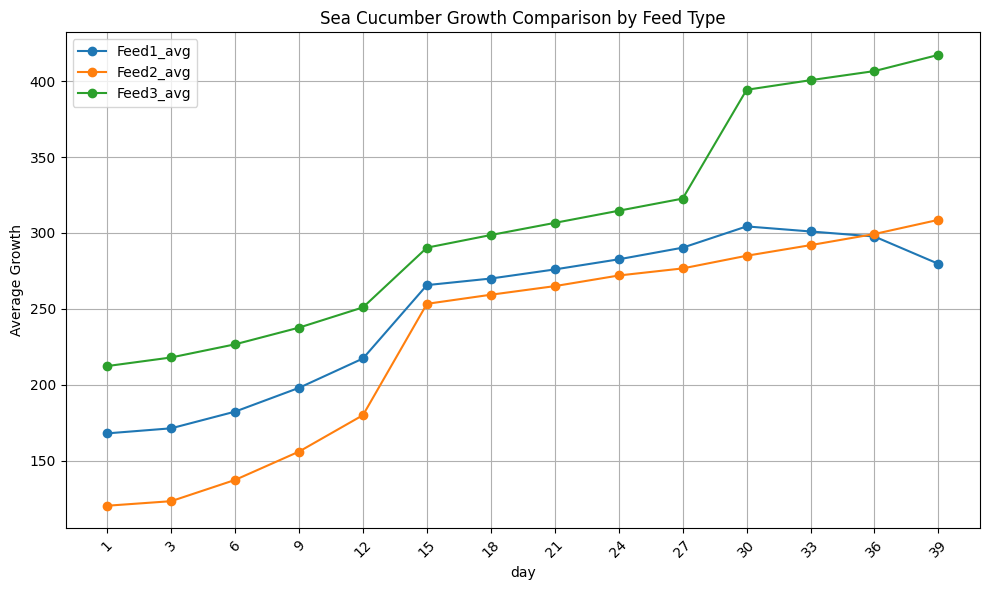

In [11]:
# 📈 Plot Average Growth Over Time
plt.figure(figsize=(10, 6))
for food in ['Feed1_avg', 'Feed2_avg', 'Feed3_avg']:
    plt.plot(df_cleaned['day'], df_cleaned[food], marker='o', label=food)
plt.xlabel('day')
plt.ylabel('Average Growth')
plt.title('Sea Cucumber Growth Comparison by Feed Type')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Which feed is best for growth?
Feed3_avg (Green Line) is the best feed for sea cucumber growth.

Why?

The green line (Feed3) consistently stays above the others.

It starts at the highest average and shows the steepest and most consistent growth trend.

It ends at the highest growth value (~417) by Day 39.

## Rank of Feeds by Growth Performance:

| Rank   | Feed Type | Comment                                                           |
| ------ | --------- | ----------------------------------------------------------------- |
|  1st | **Feed3** | Highest and most consistent growth. Best performer.               |
|  2nd | **Feed2** | Moderate growth, below Food3.                                     |
|  3rd | **Feed1** | Lowest growth, with fluctuations and possible decline at the end. |


## Final Conclusion:
Feed-3 is the most effective for sea cucumber growth based on the plotted data. It results in significantly higher average growth compared to Feed-1 and Feed-2 over time.

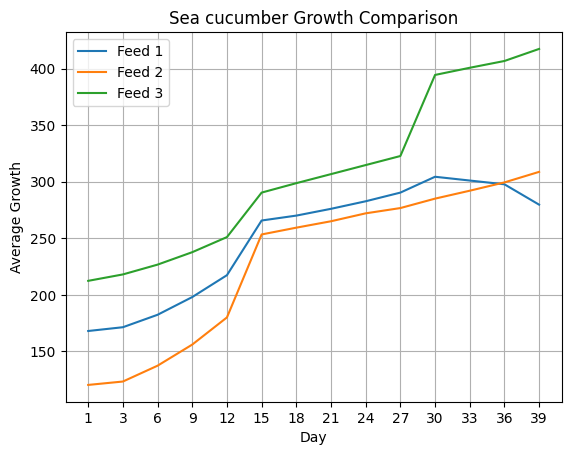

In [12]:
import matplotlib.pyplot as plt
plt.plot(df_cleaned['day'], df_cleaned['Feed1_avg'], label='Feed 1')
plt.plot(df_cleaned['day'], df_cleaned['Feed2_avg'], label='Feed 2')
plt.plot(df_cleaned['day'], df_cleaned['Feed3_avg'], label='Feed 3')
plt.xlabel('Day')
plt.ylabel('Average Growth')
plt.title('Sea cucumber Growth Comparison')
plt.legend()
plt.grid(True)
plt.show()


In [13]:
# 📊 Optional: Statistical Comparison (ANOVA)
data1 = df['Feed1_avg'].dropna()
data2 = df['Feed2_avg'].dropna()
data3 = df['Feed3_avg'].dropna()

f_stat, p_val = f_oneway(data1, data2, data3)
print(f"ANOVA F-statistic: {f_stat:.3f}, p-value: {p_val:.4f}")

if p_val < 0.05:
    print("✅ Statistically significant difference between feeds.")
else:
    print("⚠️ No statistically significant difference found.")


ANOVA F-statistic: 5.085, p-value: 0.0109
✅ Statistically significant difference between feeds.


In [14]:
df.columns

Index(['day', 'T1Rp1', 'T1Rp2', 'T1Rp3', 'T2Rp1', 'T2Rp2', 'T2Rp3', 'T3Rp1',
       'T3Rp2', 'T3Rp3', 'Temperature (?c)', 'Salinity (ppt)', 'pH',
       'DO (mg/L)', 'Feed1_avg', 'Feed2_avg', 'Feed3_avg'],
      dtype='object', name=0)

In [15]:
#ANOVA test within replication in treatment-1:
Treatment1_Replication1 = df['T1Rp1'].dropna()
Treatment1_Replication2 = df['T1Rp2'].dropna()
Treatment1_Replication3 = df['T1Rp3'].dropna()

f_stat, p_val = f_oneway(Treatment1_Replication1, Treatment1_Replication2, Treatment1_Replication3)
print(f"ANOVA F-statistic: {f_stat:.3f}, p-value: {p_val:.4f}")

if p_val < 0.05:
    print("✅ Statistically significant difference growth within replications in treatment-1.")
else:
    print("⚠️ No statistically significant difference found.")


ANOVA F-statistic: 8.153, p-value: 0.0011
✅ Statistically significant difference growth within replications in treatment-1.


In [16]:
#ANOVA test within replication in treatment-2:
Treatment2_Replication1 = df['T2Rp1'].dropna()
Treatment2_Replication2 = df['T2Rp2'].dropna()
Treatment2_Replication3 = df['T2Rp3'].dropna()

f_stat, p_val = f_oneway(Treatment2_Replication1, Treatment2_Replication2, Treatment2_Replication3)
print(f"ANOVA F-statistic: {f_stat:.3f}, p-value: {p_val:.4f}")

if p_val < 0.05:
    print("✅ Statistically significant difference growth within replications in treatment-2.")
else:
    print("⚠️ No statistically significant difference found.")


ANOVA F-statistic: 0.423, p-value: 0.6583
⚠️ No statistically significant difference found.


In [17]:
#ANOVA test within replication in treatment-3:
Treatment3_Replication1 = df['T3Rp1'].dropna()
Treatment3_Replication2 = df['T3Rp2'].dropna()
Treatment3_Replication3 = df['T3Rp3'].dropna()

f_stat, p_val = f_oneway(Treatment3_Replication1, Treatment3_Replication2, Treatment3_Replication3)
print(f"ANOVA F-statistic: {f_stat:.3f}, p-value: {p_val:.4f}")

if p_val < 0.05:
    print("✅ Statistically significant difference growth within replications in treatment-3.")
else:
    print("⚠️ No statistically significant difference found.")


ANOVA F-statistic: 106.543, p-value: 0.0000
✅ Statistically significant difference growth within replications in treatment-3.


In [18]:
# Compute correlation matrix
correlations = df_cleaned[['Feed1_avg', 'Feed2_avg', 'Feed3_avg', 'Temperature (?c)', 'Salinity (ppt)', 'pH', 'DO (mg/L)']].corr()
correlations


,Feed1_avg,Feed2_avg,Feed3_avg,Temperature (?c),Salinity (ppt),pH,DO (mg/L)
0,,,,,,,
Feed1_avg,1.000000,0.984144,0.891713,0.648053,0.414464,-0.838980,-0.702970
Feed2_avg,0.984144,1.000000,0.918454,0.677331,0.410217,-0.819810,-0.720682
Feed3_avg,0.891713,0.918454,1.000000,0.867703,0.161551,-0.787271,-0.766828
Temperature (?c),0.648053,0.677331,0.867703,1.000000,-0.173122,-0.688644,-0.577783
Salinity (ppt),0.414464,0.410217,0.161551,-0.173122,1.000000,-0.466261,-0.418151
pH,-0.838980,-0.819810,-0.787271,-0.688644,-0.466261,1.000000,0.762967
DO (mg/L),-0.702970,-0.720682,-0.766828,-0.577783,-0.418151,0.762967,1.000000


In [19]:
df.describe().round(2)

,T1Rp1,T1Rp2,T1Rp3,T2Rp1,T2Rp2,T2Rp3,T3Rp1,T3Rp2,T3Rp3,Temperature (?c),Salinity (ppt),pH,DO (mg/L),Feed1_avg,Feed2_avg,Feed3_avg
count,14.00,14.00,14.00,14.00,14.00,14.00,14.00,14.00,14.00,14.00,14.00,14.00,14.00,14.00,14.00,14.00
mean,297.93,223.43,229.57,242.57,217.93,231.29,547.71,194.14,179.07,25.69,31.20,7.98,7.31,250.31,230.60,306.98
std,35.81,49.91,70.97,71.64,63.87,76.88,63.43,70.33,90.48,2.07,1.41,0.12,0.40,51.13,70.38,73.61
min,235.00,154.00,115.00,130.00,117.00,114.00,442.00,112.00,83.00,22.55,29.33,7.76,6.72,168.00,120.33,212.33
25%,270.00,174.25,164.25,168.25,160.25,157.50,496.25,129.00,97.75,24.06,29.94,7.89,6.98,202.83,162.00,241.00
50%,315.50,226.00,267.00,285.50,244.50,256.00,562.00,186.00,160.00,25.00,31.28,8.00,7.28,273.00,262.17,302.67
75%,324.50,273.50,283.75,294.00,265.25,292.75,603.75,259.25,266.25,27.53,32.05,8.03,7.58,288.42,282.92,376.42
max,331.00,285.00,297.00,311.00,288.00,327.00,622.00,307.00,323.00,29.00,33.44,8.18,7.97,304.33,308.67,417.33
